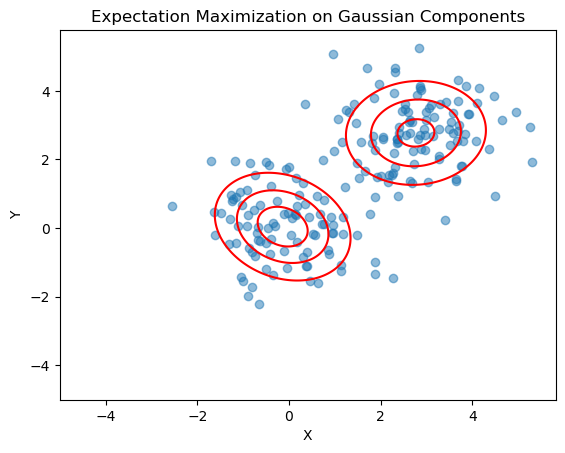

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def expectation_maximization(data, num_components, num_iterations):
    means = np.random.rand(num_components, data.shape[1])
    covariances = [np.eye(data.shape[1]) for _ in range(num_components)]
    weights = np.ones(num_components) / num_components

    for _ in range(num_iterations):
        responsibilities = []
        for i in range(num_components):
            responsibilities.append(weights[i] * multivariate_normal.pdf(data, means[i], covariances[i]))
        responsibilities = np.array(responsibilities)
        responsibilities /= np.sum(responsibilities, axis=0)

        for i in range(num_components):
            N = np.sum(responsibilities[i])
            means[i] = np.sum(responsibilities[i].reshape(-1, 1) * data, axis=0) / N
            covariances[i] = np.dot((responsibilities[i].reshape(-1, 1) * (data - means[i])).T, (data - means[i])) / N
            weights[i] = N / data.shape[0]

    return means, covariances, weights

np.random.seed(0)
data = np.concatenate([np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                       np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 100)])


num_components = 2
num_iterations = 10
means, covariances, weights = expectation_maximization(data, num_components, num_iterations)

plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
for i in range(num_components):
    x, y = np.mgrid[-5:5:.01, -5:5:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal.pdf(pos, means[i], covariances[i]), levels=3, colors='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Expectation Maximization on Gaussian Components')
plt.show()
